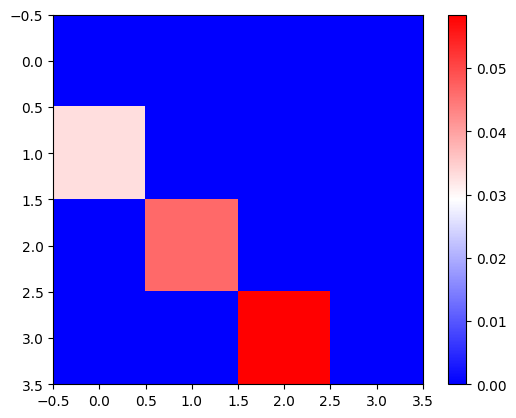

[6924264 7300397 8583510 6997099]
[[     0.      0.      0.      0.]
 [229145.      0.      0.      0.]
 [     0. 337846.      0.      0.]
 [     0.      0. 501576.      0.]]
[[0.         0.         0.         0.        ]
 [0.03309305 0.         0.         0.        ]
 [0.         0.04627776 0.         0.        ]
 [0.         0.         0.05843484 0.        ]]


In [1]:
from library import gen_population, gen_movement, gen_mov_ratio, gen_initial_cond

import numpy as np
from particle_filter import ParticleFilterParams, ParticleFilterState, run_linear_particle_filter, run_log_particle_filter
import matplotlib.pyplot as plt
from beta import gen_beta, gen_step_beta
from tau_leap import SIR_tau_leap
from output import Output


np.random.seed(2)

number_of_locations = 4
n = number_of_locations

population = gen_population(n)
movement = gen_movement(population, chain=1)
mov_ratio = gen_mov_ratio(movement, population)

initial_cond = gen_initial_cond(population)
initial_cond[0,1] = 5

#plot movement matrix as a heatmap
#add heat scale values
#do not scale the values
#let the largest value be dark red and the smallest value be dark blue
plt.imshow(mov_ratio, cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.show()

print(population)
print(movement)
print(mov_ratio)

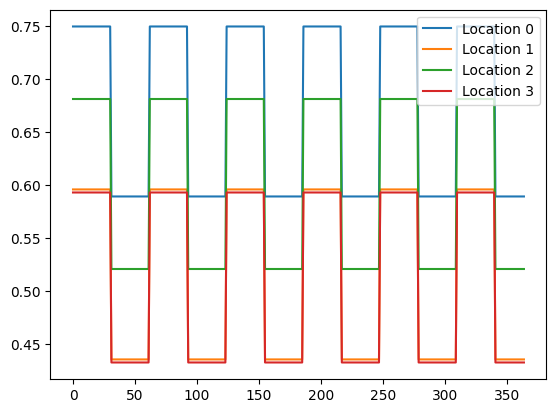

In [2]:
real_beta = gen_step_beta(n, 365)
for i in range(n):
    plt.plot(real_beta[i], label='Location ' + str(i))
plt.legend()

/home/andrew/Documents/code/multi-node-forecast/tau_leap.py:27: RuntimeWarning: invalid value encountered in divide
  mov_SI = np.divide(np.multiply(mov_I, mov_S), movement)


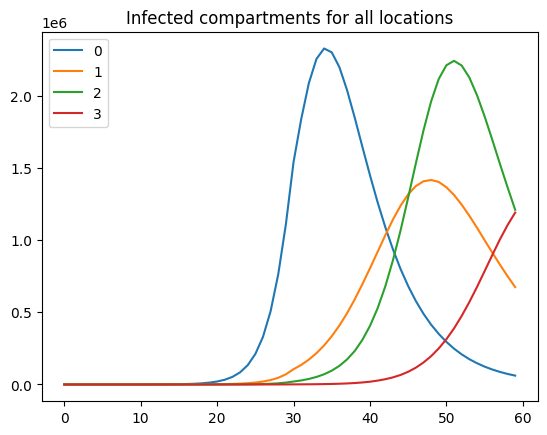

In [3]:
days = 60
results = np.zeros((days, n, 3))
results[0,:,:] = initial_cond
#first dimension of results is the time step
#second dimension is the location
#third dimension is the S,I,R compartments
for t in range(1, days):
    results[t:,:] = SIR_tau_leap(population, movement, results[t-1,:,:], real_beta[:,t])[:,:,-1]

output = Output(days, n)
output.results = results
output.plot_infected()

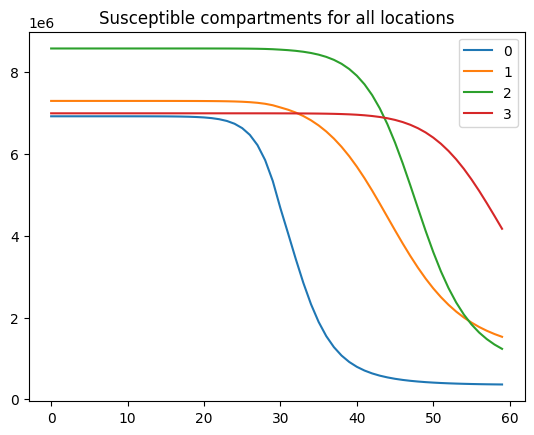

In [4]:
output.plot_susceptible()

In [5]:
# Assuming 'results', 'population', 'movement', 'SIR_tau_leap', and 'n' are defined
params = ParticleFilterParams(
    num_particles=1000,
    num_locations=n,
    population=population,
    movement=movement,
    results=output.results
)

In [6]:
log_state = run_log_particle_filter(params)

beta_post_log = log_state.beta_post
m_post_log = log_state.m_post

Iteration: 1 
Iteration: 2 
Iteration: 3 
Iteration: 4 
Iteration: 5 
Iteration: 6 
Iteration: 7 
Iteration: 8 
Iteration: 9 
Iteration: 10 
Iteration: 11 
Iteration: 12 
Iteration: 13 
Iteration: 14 
Iteration: 15 
Iteration: 16 
Iteration: 17 
Iteration: 18 
Iteration: 19 
Iteration: 20 
Iteration: 21 
Iteration: 22 
Iteration: 23 
Iteration: 24 
Iteration: 25 
Iteration: 26 
Iteration: 27 
Iteration: 28 
Iteration: 29 
Iteration: 30 
Iteration: 31 
Iteration: 32 
Iteration: 33 
Iteration: 34 
Iteration: 35 
Iteration: 36 
Iteration: 37 
Iteration: 38 
Iteration: 39 
Iteration: 40 
Iteration: 41 
Iteration: 42 
Iteration: 43 
Iteration: 44 
Iteration: 45 
Iteration: 46 
Iteration: 47 
Iteration: 48 
Iteration: 49 
Iteration: 50 
Iteration: 51 
Iteration: 52 
Iteration: 53 
Iteration: 54 
Iteration: 55 
Iteration: 56 
Iteration: 57 
Iteration: 58 
Iteration: 59 
Iteration: 60 


[[  44293.51305688   29943.27614679   31341.82984735]
 [ 469597.28636237  156119.3609524   424769.42237983]
 [ 179895.44527631  107566.3481586   141624.08680551]
 [1221177.46076206  429555.4441466   947018.62694286]]


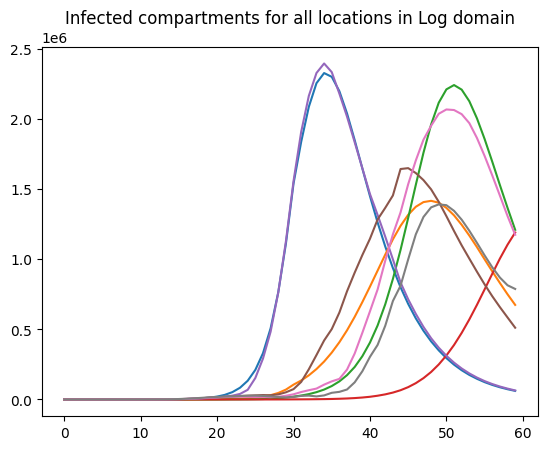

In [7]:
plt.plot(params.data)
plt.plot(m_post_log[:,:,1],alpha=1)
plt.title('Infected compartments for all locations in Log domain')

rmse_log = np.sqrt(np.mean((params.results - m_post_log)**2,axis = 0))
print(rmse_log)

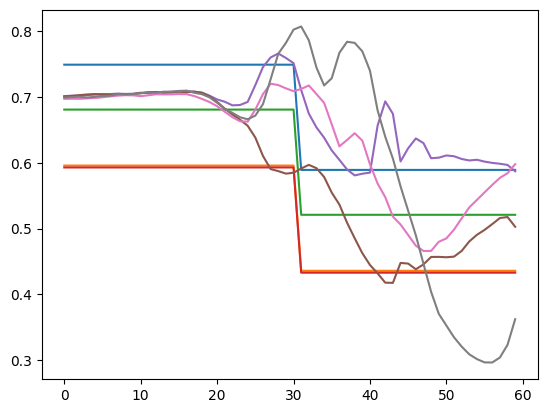

In [8]:
for i in range(n):
    plt.plot(real_beta[i,:days])

plt.plot(beta_post_log)

In [9]:

state = run_linear_particle_filter(params)

beta_post_lin = state.beta_post
m_post_lin = state.m_post


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60


[3499380.40821771 1124880.37991637 2950654.93619018]


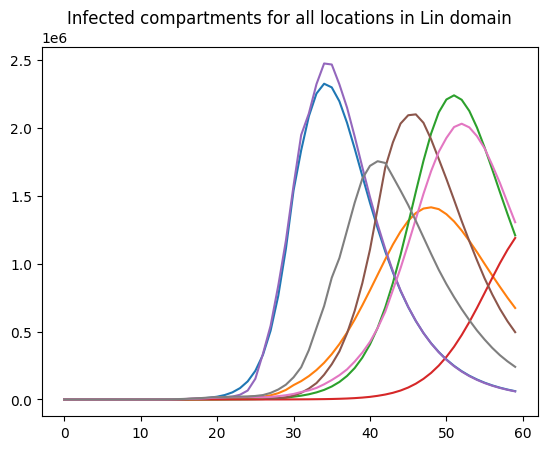

In [10]:
plt.plot(params.data)
plt.plot(m_post_lin[:,:,1], alpha=1)
plt.title('Infected compartments for all locations in Lin domain')
#compute root mean square error
rmse_lin = np.sqrt(np.mean((output.results - m_post_lin)**2,axis = 0))
print(np.sum(rmse_lin, axis = 0))

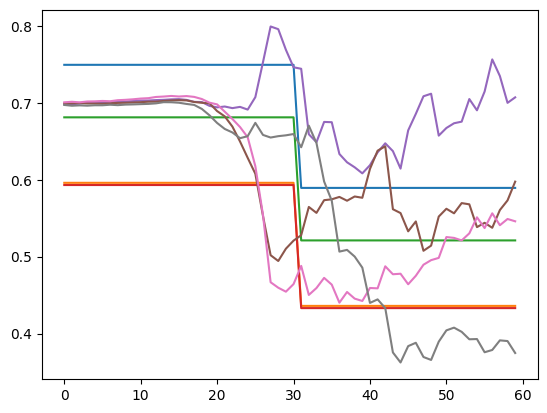

In [11]:
for i in range(n):
    plt.plot(real_beta[i,:days])
    
plt.plot(beta_post_lin)

In [12]:
rmse_log = np.sqrt(np.mean((params.results - m_post_log)**2,axis = 0))
rmse_lin = np.sqrt(np.mean((params.results - m_post_lin)**2,axis = 0))
print('RMSE Sum for Linear:', np.sum(rmse_lin, axis = 0))
print('RMSE Sum for Log:', np.sum(rmse_log, axis = 0))

RMSE Sum for Linear: [3499380.40821771 1124880.37991637 2950654.93619018]
RMSE Sum for Log: [1914963.70545761  723184.4294044  1544753.96597555]


In [13]:
slin=np.sum(rmse_lin, axis = 0)
slog=np.sum(rmse_log, axis = 0)
print(slog-slin)

[-1584416.7027601   -401695.95051197 -1405900.97021463]
